In [1]:
#DS Basics

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from pandas_profiling import ProfileReport

In [3]:
#SKLearn Stuff

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler


In [4]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import cross_val_score



In [5]:
#cross validation
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('default of credit card clients.csv', skiprows=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [7]:
#rename column
data['TYPE'] = data['default payment next month']

#drop duplicates
data = data.drop_duplicates()

#check for nulls
nulls = data.isnull().sum()
nulls




ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
TYPE                          0
dtype: int64

In [8]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,TYPE
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,default
2,3,90000,female,university,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,not default


In [9]:
data = data.loc[:, ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'TYPE']] 
print('Selected Columns')
data.head()

Selected Columns


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,TYPE
0,20000,female,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,default
2,90000,female,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,not default
3,50000,female,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,not default
4,50000,male,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,not default


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  int64 
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  TYPE       30000 non-null  object
dtypes: int64(15), object(3)
memory usage: 4.3+ MB


In [11]:
data['SEX'].describe()

count      30000
unique         2
top       female
freq       18112
Name: SEX, dtype: object

In [12]:
#label encoding
le = LabelEncoder()
le.fit(data['SEX'])
data['SEX'] = le.transform(data['SEX'])

In [13]:
data['TYPE'].describe()

count           30000
unique              2
top       not default
freq            23364
Name: TYPE, dtype: object

In [14]:
#label encoding
le = LabelEncoder()
le.fit(data['TYPE'])
data['TYPE'] = le.transform(data['TYPE'])

In [15]:
data.dtypes

LIMIT_BAL     int64
SEX           int32
EDUCATION    object
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
TYPE          int32
dtype: object

In [16]:
#Binary Column for Education
data = pd.get_dummies(data)
data.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,TYPE,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,-1,-1,-2,-2,...,3102,689,0,0,0,0,0,0,0,1
1,120000,0,2,26,-1,2,0,0,0,2,...,1725,2682,3272,3455,3261,0,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,14027,13559,14331,14948,15549,1,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,48233,49291,28314,28959,29547,1,0,0,0,1
4,50000,1,1,57,-1,0,-1,0,0,0,...,5670,35835,20940,19146,19131,1,0,0,0,1


In [17]:
data.dtypes

LIMIT_BAL                    int64
SEX                          int32
MARRIAGE                     int64
AGE                          int64
PAY_0                        int64
PAY_2                        int64
PAY_3                        int64
PAY_4                        int64
PAY_5                        int64
PAY_6                        int64
BILL_AMT1                    int64
BILL_AMT2                    int64
BILL_AMT3                    int64
BILL_AMT4                    int64
BILL_AMT5                    int64
BILL_AMT6                    int64
TYPE                         int32
EDUCATION_graduate school    uint8
EDUCATION_high school        uint8
EDUCATION_other              uint8
EDUCATION_university         uint8
dtype: object

In [18]:
data.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,TYPE,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.396267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,0.778800,0.352833,0.163900,0.015600,0.467667
std,129747.661567,0.489129,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,0.415062,0.477859,0.370191,0.123924,0.498962
min,10000.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#replace negative to positive values
data['PAY_0'] = data['PAY_0'].replace(-2,0)
data['PAY_2'] = data['PAY_2'].replace(-2,0)
data['PAY_3'] = data['PAY_3'].replace(-2,0)
data['PAY_4'] = data['PAY_4'].replace(-2,0)
data['PAY_5'] = data['PAY_5'].replace(-2,0)
data['PAY_6'] = data['PAY_6'].replace(-2,0)
data['PAY_0'] = data['PAY_0'].replace(-1,0)
data['PAY_2'] = data['PAY_2'].replace(-1,0)
data['PAY_3'] = data['PAY_3'].replace(-1,0)
data['PAY_4'] = data['PAY_4'].replace(-1,0)
data['PAY_5'] = data['PAY_5'].replace(-1,0)
data['PAY_6'] = data['PAY_6'].replace(-1,0)


In [20]:
data.describe()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,TYPE,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,0.396267,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,...,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,0.778800,0.352833,0.163900,0.015600,0.467667
std,129747.661567,0.489129,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,...,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,0.415062,0.477859,0.370191,0.123924,0.498962
min,10000.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,1.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1000000.000000,1.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,...,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
profile = ProfileReport(data, title='Profiling Report', html={'style':{'full_width':True}}) ;

In [22]:
profile.to_file(output_file="eda.html")

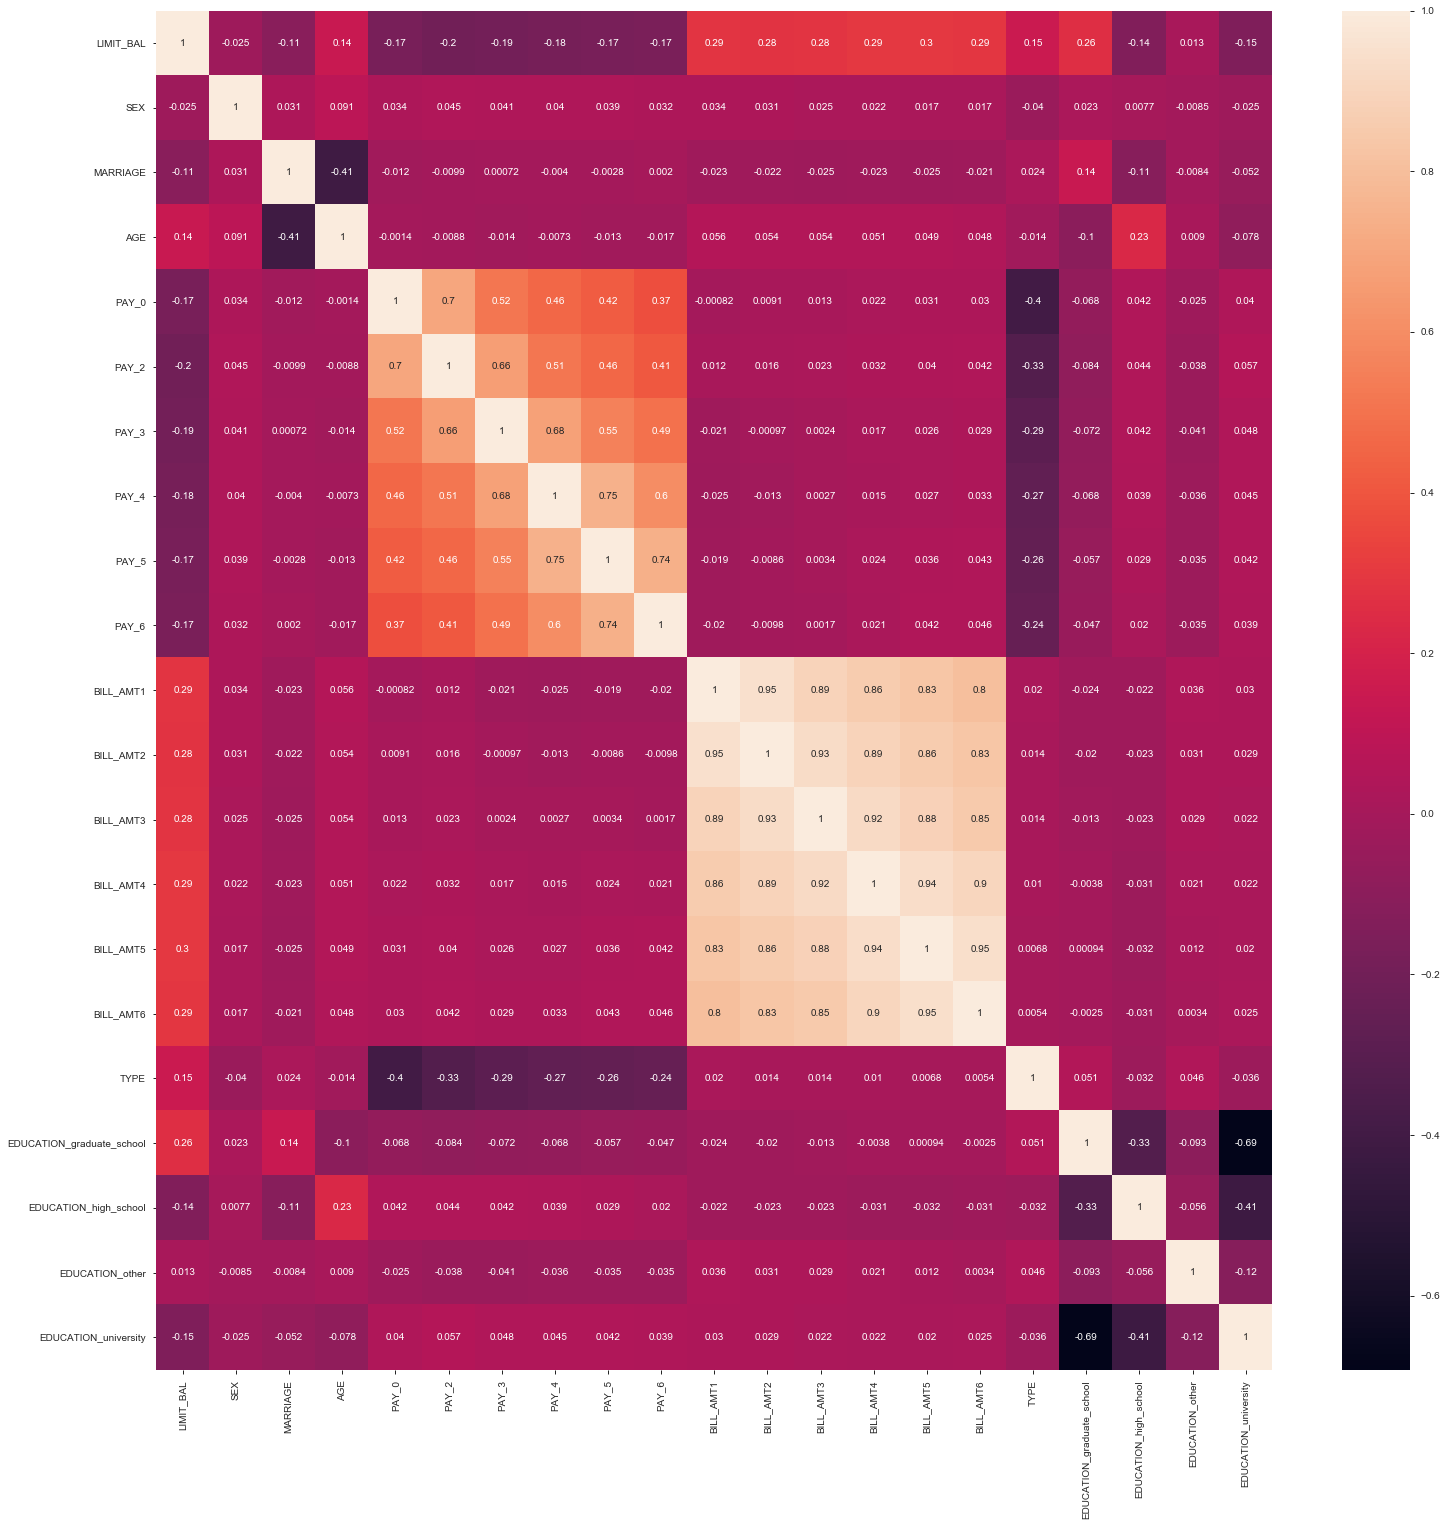

In [23]:
#correlation
data_corr = data.corr()
plt.figure(figsize=(25,25))
sn.heatmap(data_corr, annot=True)
plt.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   SEX                        30000 non-null  int32
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   PAY_0                      30000 non-null  int64
 5   PAY_2                      30000 non-null  int64
 6   PAY_3                      30000 non-null  int64
 7   PAY_4                      30000 non-null  int64
 8   PAY_5                      30000 non-null  int64
 9   PAY_6                      30000 non-null  int64
 10  BILL_AMT1                  30000 non-null  int64
 11  BILL_AMT2                  30000 non-null  int64
 12  BILL_AMT3                  30000 non-null  int64
 13  BILL_AMT4                  30000 non-null  int64
 14  BILL_AMT5             

In [25]:
datafinal = data.iloc[: , [0, 3, 10, 11, 12, 13, 14, 15, 16, 17, 19]]

In [26]:
datafinal.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,TYPE,EDUCATION_graduate_school,EDUCATION_other
0,20000,24,3913,3102,689,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,1,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,1,0,0


In [27]:
#MODELING
# features
X = datafinal.iloc[:,1:11]
print('Summary of feature sample')
X.head()

Summary of feature sample


,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,TYPE,EDUCATION_graduate_school,EDUCATION_other
0,24,3913,3102,689,0,0,0,0,0,0
1,26,2682,1725,2682,3272,3455,3261,0,0,0
2,34,29239,14027,13559,14331,14948,15549,1,0,0
3,37,46990,48233,49291,28314,28959,29547,1,0,0
4,57,8617,5670,35835,20940,19146,19131,1,0,0


In [28]:
# dependent variable
y = datafinal['LIMIT_BAL']
y.head()

0     20000
1    120000
2     90000
3     50000
4     50000
Name: LIMIT_BAL, dtype: int64

In [29]:
#Train Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [30]:
algos_Class = []
algos_Class.append(('Random Forest Regressor', RandomForestRegressor()))
algos_Class.append(('Linear Regression', LinearRegression()))
algos_Class.append(('SVR', SVR()))
print(algos_Class)

[('Random Forest Regressor', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)), ('Linear Regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)), ('SVR', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]


In [31]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3)
    names.append(name)
    results.append(result)

In [32]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.40278586550237677
Linear Regression 0.20184470846135036
SVR -0.050822299726368834


In [33]:
#Modeling (Classification)
algo = RandomForestRegressor(n_estimators=100)
model = algo.fit(X_train,y_train)

In [34]:
#Predictions
preds = model.predict(X_test)

#Assesment
print ('R2 Score is :%.3f' % r2_score(y_test, preds))
print ('MSE is :%.3f' % mean_squared_error(y_test, preds))
rms = sqrt(mean_squared_error(y_test, preds))
print ('RMSE is :%.3f' % rms)




R2 Score is :0.417
MSE is :9634338323.362
RMSE is :98154.665


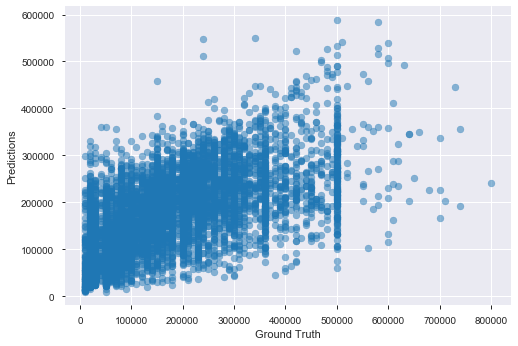

In [35]:
plt.scatter(y_test, preds, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   SEX                        30000 non-null  int32
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   PAY_0                      30000 non-null  int64
 5   PAY_2                      30000 non-null  int64
 6   PAY_3                      30000 non-null  int64
 7   PAY_4                      30000 non-null  int64
 8   PAY_5                      30000 non-null  int64
 9   PAY_6                      30000 non-null  int64
 10  BILL_AMT1                  30000 non-null  int64
 11  BILL_AMT2                  30000 non-null  int64
 12  BILL_AMT3                  30000 non-null  int64
 13  BILL_AMT4                  30000 non-null  int64
 14  BILL_AMT5             

In [37]:
#CREDIT LIMIT BIN 
binslimit = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 1000000]
#group names
limits = ['0-50k','50k-100k','100k-150k','150k-200k','200k-250k','250-300k','300k-350k','350k-400k','400k-1000k']

In [38]:
data['LIMIT_BIN'] = pd.cut(data.LIMIT_BAL, binslimit, labels = limits)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LIMIT_BAL                  30000 non-null  int64   
 1   SEX                        30000 non-null  int32   
 2   MARRIAGE                   30000 non-null  int64   
 3   AGE                        30000 non-null  int64   
 4   PAY_0                      30000 non-null  int64   
 5   PAY_2                      30000 non-null  int64   
 6   PAY_3                      30000 non-null  int64   
 7   PAY_4                      30000 non-null  int64   
 8   PAY_5                      30000 non-null  int64   
 9   PAY_6                      30000 non-null  int64   
 10  BILL_AMT1                  30000 non-null  int64   
 11  BILL_AMT2                  30000 non-null  int64   
 12  BILL_AMT3                  30000 non-null  int64   
 13  BILL_AMT4                  3000

In [40]:
data.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,TYPE,EDUCATION_graduate_school,EDUCATION_high_school,EDUCATION_other,EDUCATION_university,LIMIT_BIN
0,20000,0,1,24,2,2,0,0,0,0,...,689,0,0,0,0,0,0,0,1,0-50k
1,120000,0,2,26,0,2,0,0,0,2,...,2682,3272,3455,3261,0,0,0,0,1,100k-150k
2,90000,0,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1,0,0,0,1,50k-100k
3,50000,0,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,1,0,0,0,1,0-50k
4,50000,1,1,57,0,0,0,0,0,0,...,35835,20940,19146,19131,1,0,0,0,1,0-50k


In [41]:
#label encoding
le = LabelEncoder()
le.fit(data['LIMIT_BIN'])

LabelEncoder()

In [42]:
data['LIMIT_BIN'] = le.transform(data['LIMIT_BIN'])

In [43]:
data.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,TYPE,EDUCATION_graduate_school,EDUCATION_high_school,EDUCATION_other,EDUCATION_university,LIMIT_BIN
0,20000,0,1,24,2,2,0,0,0,0,...,689,0,0,0,0,0,0,0,1,0
1,120000,0,2,26,0,2,0,0,0,2,...,2682,3272,3455,3261,0,0,0,0,1,1
2,90000,0,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1,0,0,0,1,8
3,50000,0,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,1,0,0,0,1,0
4,50000,1,1,57,0,0,0,0,0,0,...,35835,20940,19146,19131,1,0,0,0,1,0


In [44]:
profile = ProfileReport(data, title='Profiling Report', html={'style':{'full_width':True}}) ;

In [45]:
profile.to_file(output_file="eda1.html")

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   SEX                        30000 non-null  int32
 2   MARRIAGE                   30000 non-null  int64
 3   AGE                        30000 non-null  int64
 4   PAY_0                      30000 non-null  int64
 5   PAY_2                      30000 non-null  int64
 6   PAY_3                      30000 non-null  int64
 7   PAY_4                      30000 non-null  int64
 8   PAY_5                      30000 non-null  int64
 9   PAY_6                      30000 non-null  int64
 10  BILL_AMT1                  30000 non-null  int64
 11  BILL_AMT2                  30000 non-null  int64
 12  BILL_AMT3                  30000 non-null  int64
 13  BILL_AMT4                  30000 non-null  int64
 14  BILL_AMT5             

In [47]:
datafinal2 = data.iloc[: , [21, 3, 10, 11, 12, 13, 14, 15, 16, 17, 19]]

In [48]:
datafinal2.head()

,LIMIT_BIN,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,TYPE,EDUCATION_graduate_school,EDUCATION_other
0,0,24,3913,3102,689,0,0,0,0,0,0
1,1,26,2682,1725,2682,3272,3455,3261,0,0,0
2,8,34,29239,14027,13559,14331,14948,15549,1,0,0
3,0,37,46990,48233,49291,28314,28959,29547,1,0,0
4,0,57,8617,5670,35835,20940,19146,19131,1,0,0


In [49]:
#MODELING as Classification
# features
X = datafinal2.iloc[:,1:11]
print('Summary of feature sample')
X.head()

Summary of feature sample


,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,TYPE,EDUCATION_graduate_school,EDUCATION_other
0,24,3913,3102,689,0,0,0,0,0,0
1,26,2682,1725,2682,3272,3455,3261,0,0,0
2,34,29239,14027,13559,14331,14948,15549,1,0,0
3,37,46990,48233,49291,28314,28959,29547,1,0,0
4,57,8617,5670,35835,20940,19146,19131,1,0,0


In [50]:
# dependent variable
y = datafinal2['LIMIT_BIN']
y.head()

0    0
1    1
2    8
3    0
4    0
Name: LIMIT_BIN, dtype: int32

In [51]:
#Train Model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [52]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
print(algos_Class)

[('Random Forest Classifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)), ('Decision Tree Classifier', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       r

In [53]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X,y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [54]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.42769999999999997
Decision Tree Classifier 0.3274333333333333
Gradient Boosting Classifier 0.4377


In [55]:
#Modeling (Classification)
algo = GradientBoostingClassifier()
model = algo.fit(X_train,y_train)

In [56]:
#Predictions
preds = model.predict(X_test)
print ('Accuracy Gradient'), accuracy_score(y_test, preds)

Accuracy Gradient


(None, 0.4454666666666667)

In [57]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      1931
           1       0.44      0.31      0.37       947
           2       0.26      0.42      0.32      1033
           3       0.30      0.14      0.19       760
           4       0.33      0.09      0.14       555
           5       0.29      0.06      0.10       298
           6       0.33      0.04      0.07       329
           7       0.45      0.25      0.32       444
           8       0.49      0.49      0.49      1203

    accuracy                           0.45      7500
   macro avg       0.38      0.30      0.30      7500
weighted avg       0.42      0.45      0.40      7500

